In [1]:
#Import et variables globales

from neo4j import GraphDatabase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

uri = "bolt://localhost:7687"
user  = "neo4j"
password = "admin"

In [2]:
#Cellule test

driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station) RETURN s.nom AS nom")
names = [record["nom"] for record in result]

print(names)

session.close()
driver.close()

['ABBEVILLE', 'LILLE-LESQUIN', 'PTE DE LA HAGUE', 'CAEN-CARPIQUET', 'ROUEN-BOOS', 'BREST-GUIPAVAS', 'RENNES-ST JACQUES', 'ALENCON', 'ORLY', 'TROYES-BARBEREY', 'NANCY-OCHEY', 'STRASBOURG-ENTZHEIM', 'BELLE ILE-LE TALUT', 'NANTES-BOUGUENAIS', 'TOURS', 'BOURGES', 'DIJON-LONGVIC', 'BALE-MULHOUSE', 'PTE DE CHASSIRON', 'POITIERS-BIARD', 'LIMOGES-BELLEGARDE', 'CLERMONT-FD', 'LE PUY-LOUDES', 'LYON-ST EXUPERY', 'BORDEAUX-MERIGNAC', 'GOURDON', 'MILLAU', 'MONTELIMAR', 'EMBRUN', 'MONT-DE-MARSAN', 'TARBES-OSSUN', 'ST GIRONS', 'TOULOUSE-BLAGNAC', 'MONTPELLIER', 'MARIGNANE', 'CAP CEPET', 'NICE', 'PERPIGNAN', 'AJACCIO', 'BASTIA', 'GLORIEUSES', 'JUAN DE NOVA', 'EUROPA', 'TROMELIN', 'GILLOT-AEROPORT', 'NOUVELLE AMSTERDAM', 'CROZET', 'KERGUELEN', 'PAMANDZI', 'ST-BARTHELEMY METEO', 'LE RAIZET AERO', 'LAMENTIN-AERO', 'CAYENNE-MATOURY', 'SAINT GEORGES', "DUMONT D'URVILLE", 'ST-PIERRE', 'SAINT LAURENT', 'MARIPASOULA', "PLOUMANAC'H", 'TRINITE-CARAVEL', 'LA DESIRADE METEO', 'REIMS-PRUNAY']


## Température moyenne par année (Globale et France métropolitaine)

In [2]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (r:Releve)-[:A_ETE_RELEVE_A_ANNEE]->(a:Annee) "
                     "WHERE a.numero < 2020 "
                     "RETURN a.numero AS annee, avg(r.temperature)-273.15 AS temperature_moyenne "
                     "ORDER BY annee")

temperatures_moyennes = [record for record in result]

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve)-[:A_ETE_RELEVE_A_ANNEE]->(a:Annee) "
                     "WHERE s.latitude >= 41 AND s.latitude <= 52 "
                     "AND s.longitude >= -5 AND s.longitude <= 10 "
                     "AND a.numero < 2020 "
                     "RETURN a.numero AS annee, avg(r.temperature)-273.15 AS temperature_moyenne "
                     "ORDER BY annee")

temperatures_moyennes_metropole = [record for record in result]

NameError: name 'GraphDatabase' is not defined

In [4]:
annees = [record["annee"] for record in temperatures_moyennes]

temperatures = [record["temperature_moyenne"] for record in temperatures_moyennes]

temperatures_metropole = [record["temperature_moyenne"] for record in temperatures_moyennes_metropole]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes annuelles entre 1996 et 2020", fontsize=20)

plt.plot(annees, temperatures, "r", label="Toutes stations")
plt.plot(annees, temperatures_metropole, "b", label="Métropole")

plt.xlabel("Année", fontsize=15)
plt.ylabel("Température moyenne (°C)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



plt.legend()
plt.show()

NameError: name 'temperatures_moyennes' is not defined

## Température moyenne par mois

In [14]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve)-[:A_ETE_RELEVE_AU_MOIS]->(m:Mois) "
                     "WHERE s.latitude >= 41 AND s.latitude <= 52 "
                     "AND s.longitude >= -5 AND s.longitude <= 10 "
                     "RETURN m.numero AS mois, avg(r.temperature)-273.15 AS temperature_moyenne "
                     "ORDER BY mois")

temperatures_moyennes = [record for record in result]

In [5]:
mois = [record["mois"] for record in temperatures_moyennes]

temperatures = [record["temperature_moyenne"] for record in temperatures_moyennes]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes mensuelles entre 1996 et 2020 (France métropolitaine)", fontsize=20)

plt.plot(mois, temperatures, "r")

plt.xlabel("Mois", fontsize=15)
plt.ylabel("Température moyenne (°C)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

SyntaxError: invalid syntax (<ipython-input-5-d23b66bd3c59>, line 14)

## Moyenne par station

In [39]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve) "
                     "RETURN s.nom AS station, avg(r.temperature)-273.15 AS temperature_moyenne "
                     "ORDER BY temperature_moyenne")

temperatures_moyennes = [record for record in result]

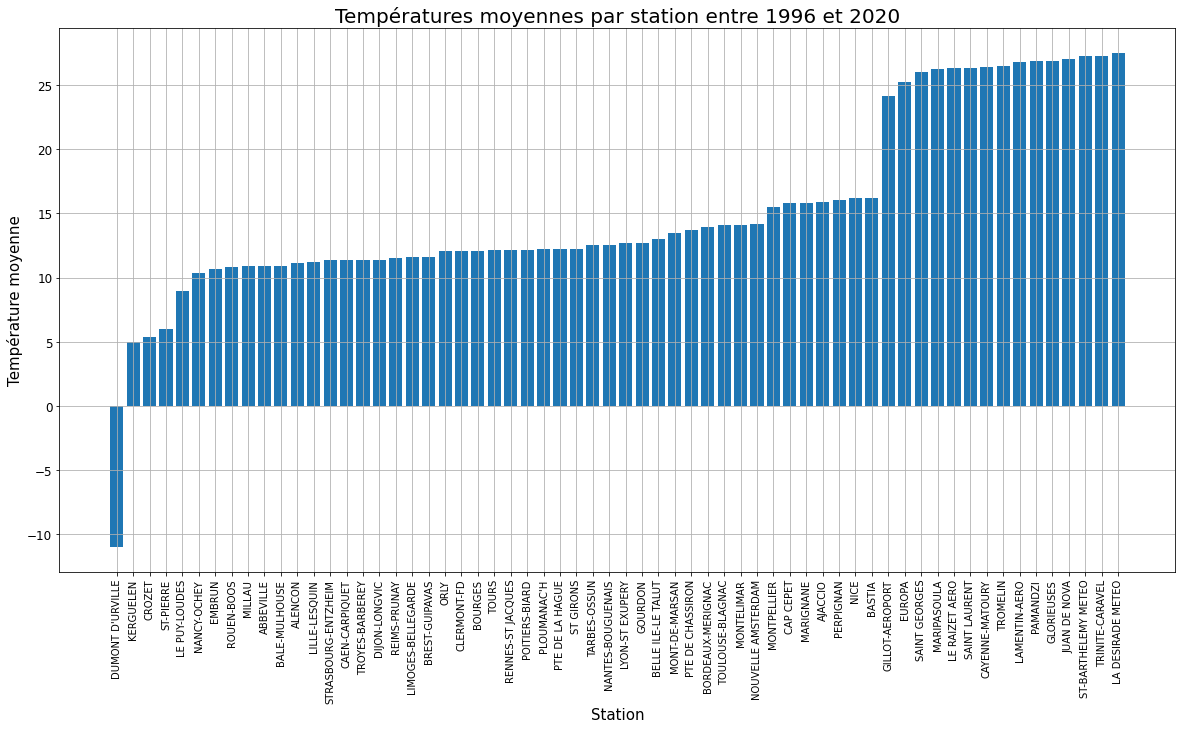

In [45]:
stations = [record["station"] for record in temperatures_moyennes]

temperatures = [record["temperature_moyenne"] for record in temperatures_moyennes]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes par station entre 1996 et 2020", fontsize=20)

ax.bar(stations, temperatures)

plt.xlabel("Station", fontsize=15)
plt.ylabel("Température moyenne (°C)", fontsize=15)

plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=12)

plt.grid()
plt.show()

In [46]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve) "
                     "WITH avg(r.temperature)-273.15 AS temperature_moyenne, s "
                     "WHERE temperature_moyenne >= 20 "
                     "RETURN s.nom AS station, temperature_moyenne "
                     "ORDER BY temperature_moyenne")

temperatures_moyennes = [record for record in result]

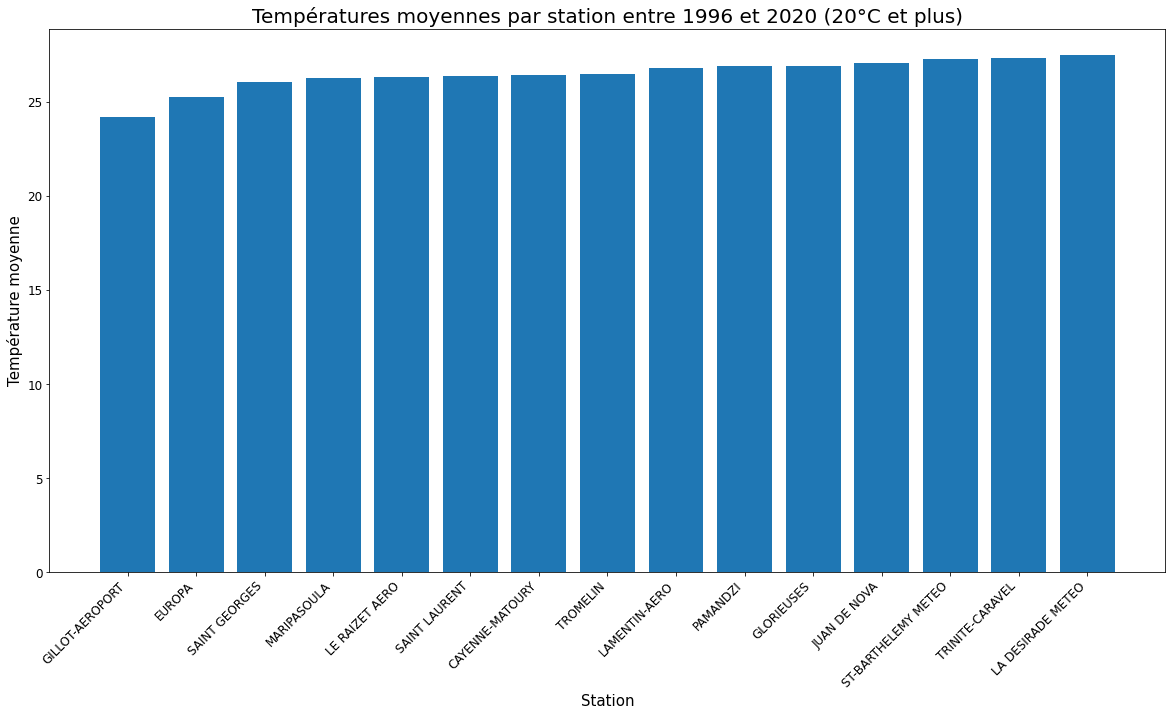

In [47]:
stations = [record["station"] for record in temperatures_moyennes]

temperatures = [record["temperature_moyenne"] for record in temperatures_moyennes]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes par station entre 1996 et 2020 (20°C et plus)", fontsize=20)

ax.bar(stations, temperatures)

plt.xlabel("Station", fontsize=15)
plt.ylabel("Température moyenne (°C)", fontsize=15)

plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()

In [48]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve) "
                     "WITH avg(r.temperature)-273.15 AS temperature_moyenne, s "
                     "WHERE temperature_moyenne <= 10 "
                     "RETURN s.nom AS station, temperature_moyenne "
                     "ORDER BY temperature_moyenne")

temperatures_moyennes = [record for record in result]

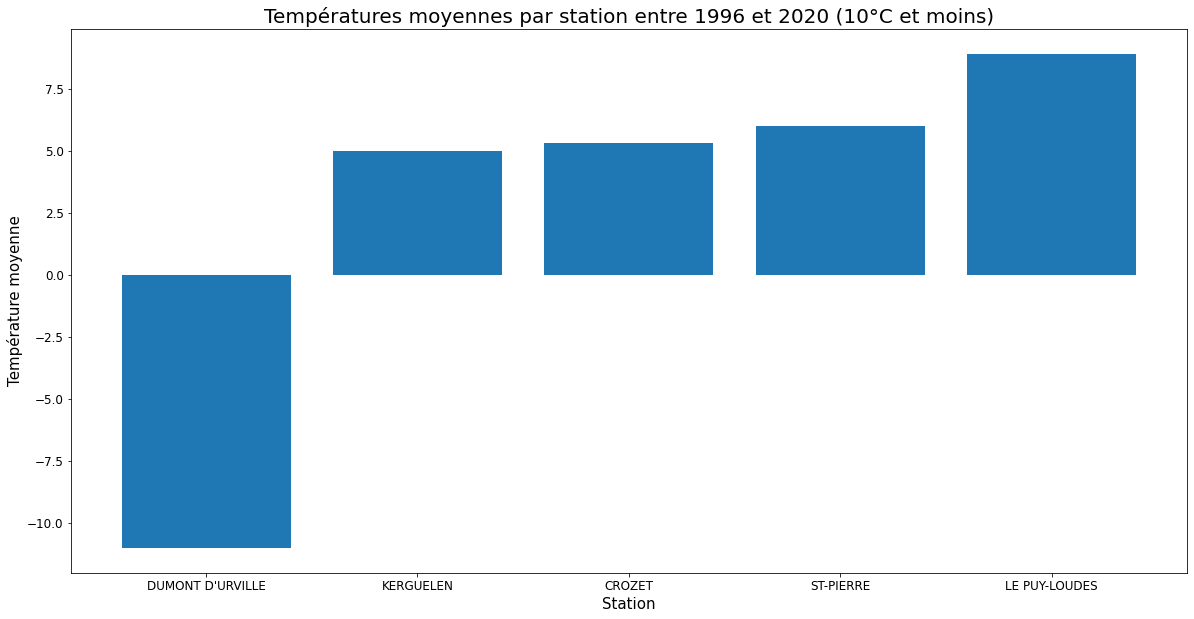

In [49]:
stations = [record["station"] for record in temperatures_moyennes]

temperatures = [record["temperature_moyenne"] for record in temperatures_moyennes]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes par station entre 1996 et 2020 (10°C et moins)", fontsize=20)

ax.bar(stations, temperatures)

plt.xlabel("Station", fontsize=15)
plt.ylabel("Température moyenne (°C)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Evolution des températures minimales et maximales par année

In [61]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (r:Releve)-[:A_ETE_RELEVE_A_ANNEE]->(a:Annee) "
                     "WHERE a.numero < 2020 "
                     "RETURN a.numero AS annee, min(r.temperature)-273.15 AS temperature_min "
                     "ORDER BY annee")

temperatures_min = [record for record in result]

result = session.run("MATCH (r:Releve)-[:A_ETE_RELEVE_A_ANNEE]->(a:Annee) "
                     "WHERE a.numero < 2020 "
                     "RETURN a.numero AS annee, max(r.temperature)-273.15 AS temperature_max "
                     "ORDER BY annee")

temperatures_max = [record for record in result]

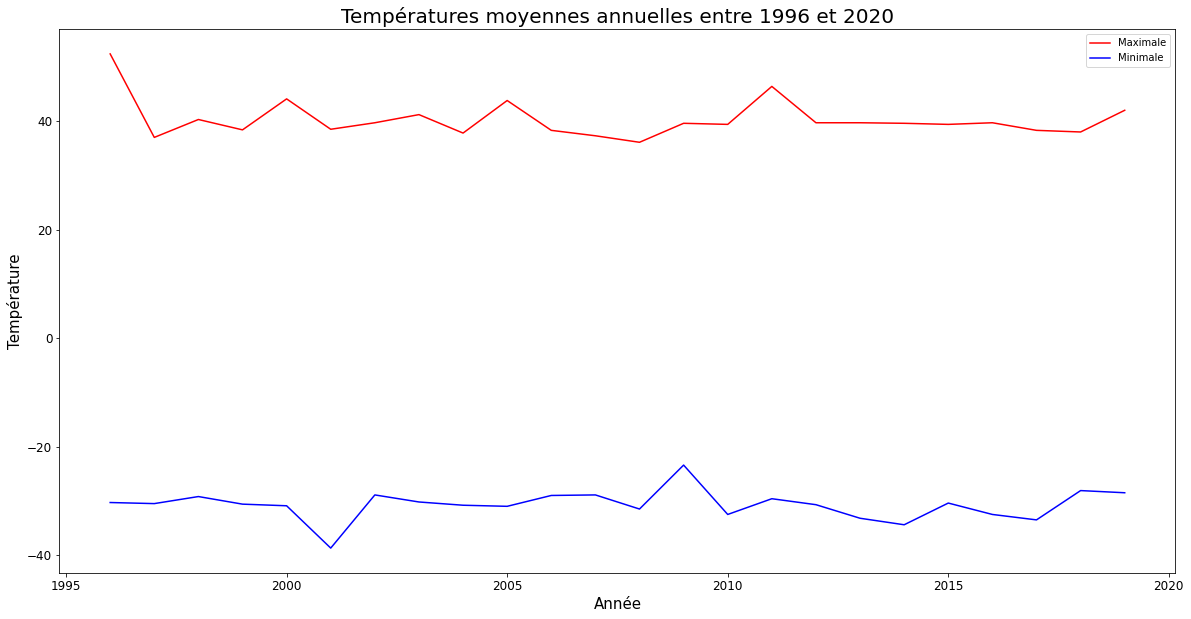

In [62]:
annees = [record["annee"] for record in temperatures_min]

temperatures_max = [record["temperature_max"] for record in temperatures_max]

temperatures_min = [record["temperature_min"] for record in temperatures_min]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Températures moyennes annuelles entre 1996 et 2020", fontsize=20)

plt.plot(annees, temperatures_max, "r", label="Maximale")
plt.plot(annees, temperatures_min, "b", label="Minimale")

plt.xlabel("Année", fontsize=15)
plt.ylabel("Température (°C)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()
plt.show()

## Ecart à la normale des années 1996-2009 pendant l'été sur les année 2010-2020

In [63]:
driver = GraphDatabase.driver(uri, auth=(user, password))
session = driver.session()

result = session.run("MATCH (s:Station)<-[:A_ETE_RELEVE_A_STATION]-(r:Releve)-[:A_ETE_RELEVE_AU_MOIS]->(m:Mois) "
                     "MATCH (r)-[:A_ETE_RELEVE_A_ANNEE]->(a:Annee) "
                     "WHERE 7 <= m.numero <= 9 "
                     "AND s.latitude >= 41 AND s.latitude <= 52 "
                     "AND s.longitude >= -5 AND s.longitude <= 10 "
                     "AND 1996 <= a.numero <= 2009 "
                     "MATCH (s)<-[:A_ETE_RELEVE_A_STATION]-(r2:Releve)-[:A_ETE_RELEVE_AU_MOIS]->(m) "
                     "MATCH (r2)-[:A_ETE_RELEVE_A_ANNEE]->(a2:Annee) "
                     "WHERE 2010 <= a2.numero <= 2020 "
                     "RETURN a2.numero AS annee, avg(r2.temperature)-avg(r.temperature) AS ecart")

ecarts_moyens = [record for record in result]

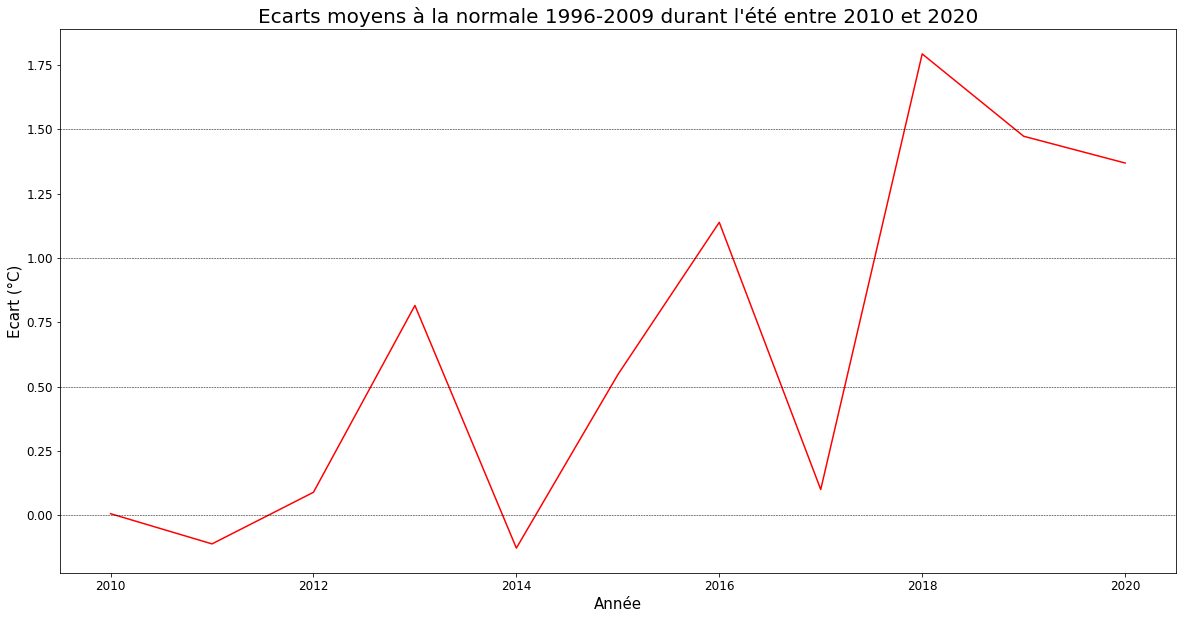

In [73]:
annees = [record["annee"] for record in ecarts_moyens]

ecarts = [record["ecart"] for record in ecarts_moyens]

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title("Ecarts moyens à la normale 1996-2009 durant l'été entre 2010 et 2020", fontsize=20)

plt.plot(annees, ecarts, "r")

plt.xlabel("Année", fontsize=15)
plt.ylabel("Ecart (°C)", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=0.5, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=1.5, color='k', linestyle='--', linewidth=0.5)

plt.show()